## Algoritmos Evolutivos: Trabajo Práctico Nº1

Autores: Joaquín Matías Mestanza y Gonzalo Nicolas Silva Caggiano


### Ejercicio 1:

Mediante un algoritmo genético desarrollado en Python encontrar el valor máximo de la función
$
y=x^2
$
a. Indicar el resultado de la solución encontrada (valor de "x") si se ejecutan 10 lanzamientos del algoritmo.
Parámetros:

- Selección por ruleta
- Intervalo de la variable de decisión: [0,31] ∈ Z
- Aplicar elitismo: Sí
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce: 0.92
- Probabilidad de mutación: 0.1
- Tamaño de la población: 4
- Generaciones 10


In [1]:
import pandas as pd
import random
import numpy as np

from EvolutionaryAlgorithm import Roulette

df = pd.DataFrame()
executions = 10

random.seed(42)
for run in range(executions):

    ea = Roulette(
        generations=10,
        chromosome_length=5,
        population_length=4,
        maximize=True,
        target_fn=lambda x: x**2,
        elitism=True,
        crossover_rate=0.92,
        x_min=0,
        x_max=31,
        mutation_rate=0.1
    )
    ea.execute()
    chromosome, best, fitness = ea.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)      
    
display(df)

,run,best chromosome,best solution,fitness
0,0,11111,31.0,961.0
1,1,11111,31.0,961.0
2,2,11111,31.0,961.0
3,3,11111,31.0,961.0
4,4,11101,29.0,841.0
5,5,11111,31.0,961.0
6,6,11111,31.0,961.0
7,7,11111,31.0,961.0
8,8,11101,29.0,841.0
9,9,11111,31.0,961.0


### Ejercicio 2
Minimizar mediante tres algoritmos genéticos desarrollados en Python la función $
y=x^2
$

Indicar el resultado de la solución encontrada (valor de "x") si se ejecutan 3 algoritmos un total de 30 lanzamientos cada uno.
Parámetros:
- Selección por Ranking, Ruleta y Torneo
- Intervalo de la variable de decisión: [-31,31] ∈ R (con un dígito decimal)
- Aplicar elitismo: Sí (Sólo en método ruleta y ranking)
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce: 0.85
- Probabilidad de mutación: 0.09
- Tamaño de la población: 4
- Generaciones 10

In [2]:
from EvolutionaryAlgorithm import Roulette
import pandas as pd
import math

executions = 30

x_max = 31
x_min = -31

decimal_places = 1 # .1
bits = math.ceil(np.log2((x_max-x_min) * (10**decimal_places)))

df_roulette = pd.DataFrame()

original_common_params = {
    "chromosome_length": bits, 
    "maximize": False,
    "target_fn": lambda x:x**2,
    "x_min": x_min,
    "x_max": x_max,
    "crossover_rate": 0.85,
    "mutation_rate": 0.09,
    "population_length": 4,
    "generations": 10,
}

original_roulette_params = {
    **original_common_params,
    "elitism": True,
}

random.seed(42)
for run in range(executions):
    eaRoulette = Roulette(**original_roulette_params)
    eaRoulette.execute()
    chromosome, best, fitness = eaRoulette.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_roulette = pd.concat([df_roulette, pd.DataFrame([row])], ignore_index=True)      
    
# display(df_roulette)

In [3]:
from EvolutionaryAlgorithm import LinearRanking
df_linear_ranking = pd.DataFrame()

original_linear_ranking_params = {
    **original_common_params,
    "elitism": True,
}

random.seed(42)
for run in range(executions):
    eaLinearRanking = LinearRanking(**original_linear_ranking_params)
    eaLinearRanking.execute()
    chromosome, best, fitness = eaLinearRanking.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_linear_ranking = pd.concat([df_linear_ranking, pd.DataFrame([row])], ignore_index=True)      
    
# display(df_linear_ranking)

In [4]:
from EvolutionaryAlgorithm import Tournament
df_tournament = pd.DataFrame()

original_tournament_params = {
    **original_common_params,
    "tournament_size": 3,
    "elitism": False,
}

random.seed(42)
for run in range(executions):
    eaTournament = Tournament(**original_tournament_params)
    eaTournament.execute()
    chromosome, best, fitness = eaTournament.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_tournament = pd.concat([df_tournament, pd.DataFrame([row])], ignore_index=True)      

# display(df_tournament)

In [5]:
new_df = pd.DataFrame()
new_df["roulette"] = df_roulette["best solution"]
new_df["linear ranking"] = df_linear_ranking["best solution"]
new_df["tournament"] = df_tournament["best solution"]
new_df.index.name = 'run'
display(new_df)

,roulette,linear ranking,tournament
run,,,
0,0.272727,0.272727,7.787879
1,0.030303,0.030303,-0.030303
2,0.030303,0.030303,0.454545
3,0.757576,1.242424,-0.212121
4,-1.303030,-0.454545,-8.030303
5,0.030303,0.030303,0.393939
6,-0.090909,-0.515152,0.090909
7,1.181818,0.696970,1.060606
8,0.272727,0.030303,0.151515


b. (Valor 0.75 puntos) Completar la siguiente tabla en base a las 30 ejecuciones con los parámetros señalados.

In [6]:
comparison = pd.DataFrame()
algorithms = ['Linear Ranking', 'Roulette', 'Tournament']
for dataframe, algorithm in zip([df_linear_ranking, df_roulette, df_tournament], algorithms):
    row = {'algorithm': algorithm }
    desc = dataframe['best solution'].describe()
    for statistic in ['min', 'mean', 'max', 'std']:
        row[statistic] = desc[statistic]
    comparison = pd.concat([comparison, pd.DataFrame([row])], ignore_index=True)     
    
display(comparison)

,algorithm,min,mean,max,std
0,Linear Ranking,-7.787879,-0.222222,1.969697,1.551871
1,Roulette,-3.060606,0.197980,9.727273,1.958868
2,Tournament,-8.030303,0.248485,7.787879,2.233431


c. (Valor 0.75 puntos) Explicar (en el .pdf) una interpretación de los
resultados obtenidos en el ítem anterior.

Dada la tabla se puede observar lo siguiente: 
- En los 3 tipos de selecciones la media tiende a estar cerca del 0, que es donde está el valor óptimo.
- La velocidad de convergencia hacia un posible mínimo se ve afectada por el algoritmo de selección y sus hiperparámetros.
- El algoritmo de selección Tournament es el que más varianza posee de los 3, lo cual indica que podría ser el peor de los 3.
- La evidencia sugiere que el hecho de aplicar elitismo es mejor para la velocidad de convergencia del algoritmo.




d. (Valor 1 punto) Modificar los parámetros Pm, Tamaño de la población y
Generaciones de modo tal que se consiga encontrar una combinación
que permita obtener el mejor valor óptimo y su correspondiente solución
(para cada algoritmo habrá una combinación diferente). Transcribir las
combinaciones encontradas en el .pdf.

e. (Valor 0.5 puntos) Realizar 6 curvas de convergencia; 3 correspondientes
a los algoritmos con los parámetros originales y 3 correspondientes a los
algoritmos con los mejores parámetros encontrados en el ítem d. Mostrar
las 6 curvas en el .pdf. Las curvas deben contener título, leyenda y
etiquetas en los ejes.




Resolvemos d. y e. en conjunto.

En primer lugar obtenemos la soluciones óptimas:

In [7]:
possible_values = np.linspace(x_min, x_max, 2**bits)
idx = next(i for i in range(len(possible_values)) if possible_values[i] > 0)
optimal_solutions = (possible_values[idx-1:idx+1])
print(optimal_solutions)

[-0.03030303  0.03030303]


Veamos cual es el valor óptimo de fitness para las soluciones óptimas

In [8]:
from EvolutionaryAlgorithm import EvolutionaryAlgorithm
ea_util = EvolutionaryAlgorithm(**original_roulette_params)
best_possible = ea_util.fitness(ea_util.dec_to_bin(optimal_solutions[0]))
best_possible

521.3020584011347

Corremos los algoritmos con los parámetros originales.

Text(0, 0.5, 'Fitness')

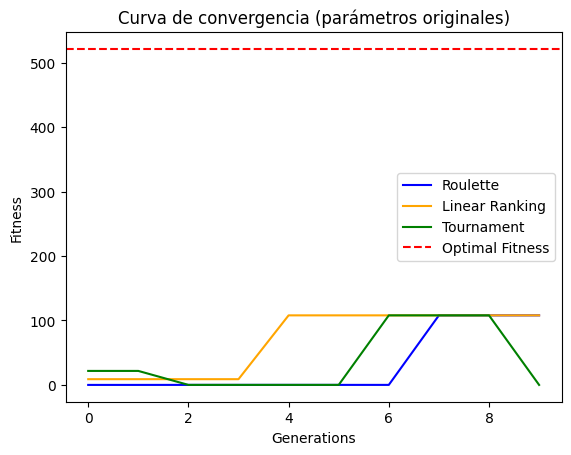

In [9]:
import matplotlib.pyplot as plt 

models = [Roulette, LinearRanking, Tournament]
original_params = [original_roulette_params, original_linear_ranking_params, original_tournament_params]
colors = ['blue', 'orange', 'green']

random.seed(31) # set seed for reproducibility
for model, params, color in zip(models, original_params, colors):
    ea = model(**params)
    ea.execute()
    generations = params["generations"]
    x_axis = range(generations)
    y_axis = [ea.fitness(ea.generation_best[i]) for i in range(generations)]
    plt.plot(x_axis, y_axis, color=color, label=ea.model_name)

plt.axhline(y=best_possible, linestyle='--', color='red', label='Optimal Fitness')
plt.legend()
plt.title('Curva de convergencia (parámetros originales)')
plt.xlabel('Generations')
plt.ylabel('Fitness')
     

Haremos una búsqueda de hiperparámetros en formato grilla y nos quedamos con el primer modelo (de cada tipo) que converja a la solución óptima.


Model: Linear Ranking
Params: {'population_length': 7, 'generations': 10, 'mutation_rate': 0.01}
Model: Tournament
Params: {'population_length': 7, 'generations': 15, 'mutation_rate': 0.01}
Model: Roulette
Params: {'population_length': 4, 'generations': 15, 'mutation_rate': 0.05}


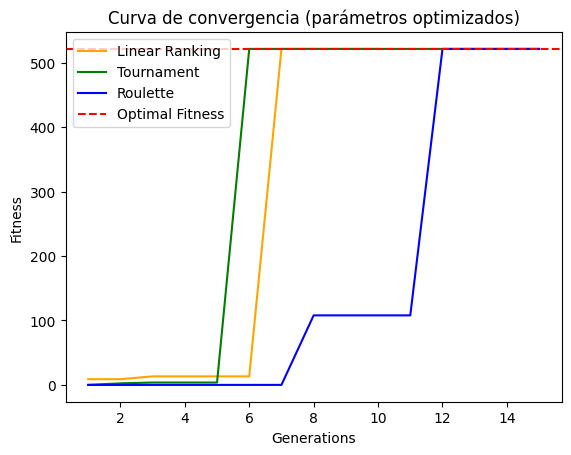

In [10]:
def params_search(seed):
    pms = [0.01, 0.05, 0.10] # pms chicos
    population_sizes = [4, 7, 10]
    generations_num = [5,10,15]
    
    found_optimal = {}
    
    for pm in pms: 
        for p_size in population_sizes:
            for generation_num in generations_num: 
                random.seed(seed)
                for model, params, color in zip(models, original_params, colors):
                    new_params = {
                        **params,
                        "population_length": p_size,
                        "generations": generation_num,
                        "mutation_rate": pm
                    }
                    ea = model(**new_params)
                    best_chromosome = ea.execute()
                    if ea.model_name not in found_optimal and ea.fitness(best_chromosome) == best_possible:
                        y_axis = list(map(ea.fitness, ea.generation_best))
                        found_optimal[ea.model_name] = {
                            "population_length": p_size,
                            "generations": generation_num,
                            "mutation_rate": pm,
                            "y_axis": y_axis,
                            "color": color,
                            "label": ea.model_name
                        }
    
    
    
    for key,value in found_optimal.items():
        print('Model:', key)
        plt.plot(range(1, 1+ len(value["y_axis"])),value["y_axis"], color=value["color"], label=value["label"])
        print('Params:', {
            "population_length": value["population_length"],
            "generations": value["generations"],
            "mutation_rate": value["mutation_rate"],
        })
        
    plt.axhline(y=best_possible, linestyle='--', color='red', label='Optimal Fitness')
    plt.legend()
    plt.title('Curva de convergencia (parámetros optimizados)')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    
params_search(seed=31)

En la búsqueda de parámetros se observó que cambiando la semilla se podían obtener resultados muy distintos entre sí, lo cual es lógico ya que tenemos el azar como parte de nuestros algoritmos.

Se procede a mostrar ejemplos de esta observación:

Model: Linear Ranking
Params: {'population_length': 4, 'generations': 15, 'mutation_rate': 0.01}
Model: Roulette
Params: {'population_length': 7, 'generations': 10, 'mutation_rate': 0.05}
Model: Tournament
Params: {'population_length': 7, 'generations': 15, 'mutation_rate': 0.05}


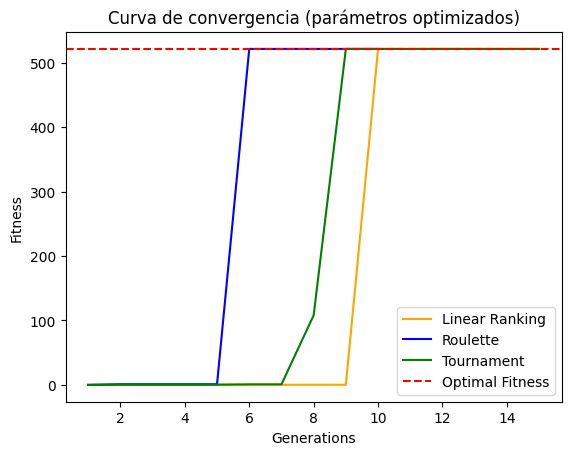

In [11]:
params_search(1)

Model: Tournament
Params: {'population_length': 7, 'generations': 15, 'mutation_rate': 0.01}
Model: Roulette
Params: {'population_length': 10, 'generations': 15, 'mutation_rate': 0.01}
Model: Linear Ranking
Params: {'population_length': 7, 'generations': 15, 'mutation_rate': 0.05}


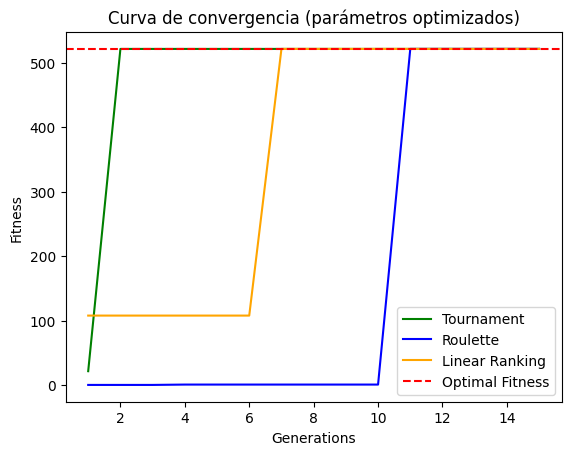

In [12]:
params_search(20)

f. (Valor 0.5 puntos) Interpretar tanto las combinaciones de parámetros
encontradas en cada uno de los 3 algoritmos como sus graficas de
convergencia en el ítem anterior y explicarlas en el .pdf.

Se puede observar: 
- Que las semillas tienen fuerte influencia sobre nuestros algoritmos
- Que los comportamientos deberían ser analizados estadísticamente, es decir como hicimos inicialmente, con más de 30 corridas distintas del mismo algoritmo y observando minimos,maximos, desviación estándar y la media para establecer tendencias.
- Mantuvimos el tamaño del torneo en 3, es probable que con mayor population size de peores resultados el algoritmo de Tournament, ya que justamente tiene mucho menos candidatos para elegir en comparación al tamaño de la población.
- En la curva con parámetros originales se ve una degradación en el fitness en el caso de Tournament, esto puede ser debido a que justo los individuos que seleccionamos para el torneo eran los que menos fitnesse poseían y eso pasó durante algunas generaciones.


## Ejercicio 3

La distribución de la concentración de cierto contaminante en un canal está
descrita por la ecuación:

$$
c(x,y) = 7.7 + 0.15x + 0.22y - 0.05x^2 -0.016y^2-0.007xy
$$

En donde, las variables independientes se encuentran entre los límites de –10 ≤
x ≤ 10, 0 ≤ y ≤ 20.
Para la función de adaptación anterior, escribir y ejecutar dos algoritmos
genéticos que utilicen el operador de selección por ruleta y torneo
respectivamente con probabilidades de cruza y mutación a elección. Luego
realizar las siguientes consignas para ambos algoritmos:

a. (Valor 1.5 puntos) Determinar en forma aproximada la concentración
máxima dada la función c(x, y). Utilizar una precisión de 3 decimales.
Transcribir en el .pdf el resultado obtenido en ambos algoritmos.

c. (Valor 0.75 puntos) Graficar c(x, y) en 3D para los intervalos de las
variables independientes ya mencionados y agregar un punto rojo
(ruleta) y un punto azul (torneo) en la gráfica en donde el algoritmo haya
encontrado el valor máximo. Cada gráfico debe contener título, leyenda
y etiquetas en los ejes.

d. (Valor 0.75 puntos) Graficar las mejores aptitudes encontradas en
función de cada generación (Curva de convergencia de ambos
algoritmos). Cada gráfico debe contener título, leyenda y etiquetas en los
ejes.

e. (Valor 1.5 puntos) Realizar conclusiones/comentarios/observaciones
respecto a los resultados obtenidos en ambos algoritmos.


Cómo serian los nuevos x_max y x_min?

- Hacemos de cuenta que el problema original se trata de un solo cromosoma de 30 bits.
- No hace falta un remappeo de los bits a un nuevo x_max y x_min ya que usando los bits del cromosoma ya sabemos como evaluar la función objetivo.
Es por eso que el nuevo intervalo de "x_min" y "x_max" es de $[0, 2^{totalbits} -1]$


Para no cambiar los algoritmos ya implementados, decidimos ajustar la target function.
Para escribir código de forma limpia y realizar calculos internos se creó la clase BivariateTargetFun.

In [13]:
from EvolutionaryAlgorithm import BivariateTargetFun
bivariate = BivariateTargetFun(x1_min=-10, x1_max=10, x2_min=0, x2_max=20, decimal_places=3)

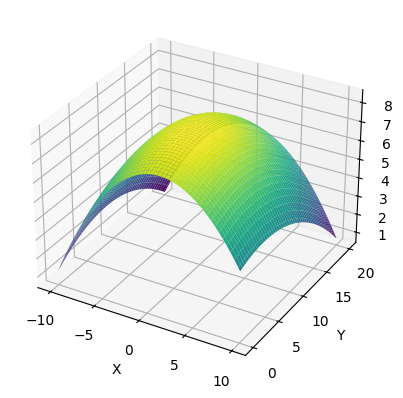

In [14]:
bivariate.plot_function()

Se sabe que el óptimo en esta región es con 
- x$\approx$1.03
- y$\approx$6.65

Da un valor fitness$\approx$8.51


In [15]:
from EvolutionaryAlgorithm import Roulette, BivariateTargetFun
import pandas as pd

bivariate = BivariateTargetFun(x1_min=-10, x1_max=10, x2_min=0, x2_max=20, decimal_places=3)

df = pd.DataFrame()

ej3_common_params = {
    "generations": 10,  
    "chromosome_length": bivariate.total_bits,
    "population_length": 8,
    "maximize": True,
    "target_fn": bivariate.target_fun,
    "crossover_rate": 0.9,
    "x_min": 0,
    "x_max": 2**bivariate.total_bits-1,
    "mutation_rate": 0.1
}
ej3_params_roulette = {
    **ej3_common_params,
    "elitism": True
}
ej3_params_tournament = {
    **ej3_common_params,
    "elitism": False,
    "tournament_size": 3
}

points = {}

ev_algorithms = []

for model, params in zip([Roulette, Tournament],[ej3_params_roulette, ej3_params_tournament]):
    ea = model(**params)
    ea.execute()
    chromosome, best, fitness = ea.get_best_individual()
    _x,_y = bivariate.split_answer(chromosome)
    row = {"model": ea.model_name, "best chromosome": chromosome,  "best solution": best, "x(best)": _x, "y(best)": _y, "fitness": fitness}
    points[ea.model_name] = {"x": _x, "y":_y, "z": fitness} 
    ev_algorithms.append(ea)
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)      
    
display(df)

,model,best chromosome,best solution,x(best),y(best),fitness
0,Roulette,100011011010100010010110111100,594159036.0,1.067232,5.896176,8.500008
1,Tournament,011101011101011011010010100111,494253223.0,-0.793786,8.227180,8.322137


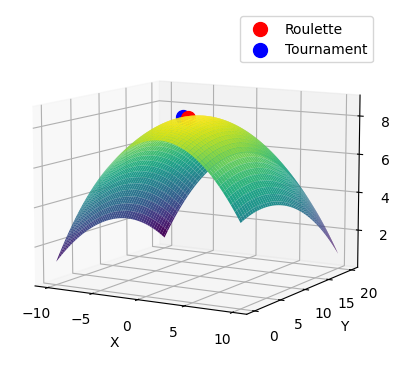

In [16]:
def plot_cb(axes):
    for model_name, point in points.items():
        x = point["x"]
        y = point["y"]
        z = point["z"]
        color = 'red' if model_name == 'Roulette' else 'blue'
        axes.scatter(x,y,z, color=color, s=100, label=model_name)
    axes.view_init(elev=10)
    axes.legend()
    # axes.
bivariate.plot_function(plot_cb)

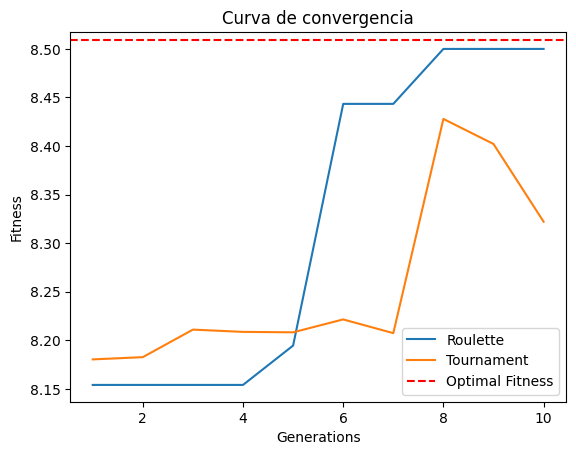

In [17]:
for ea in ev_algorithms:
    name = ea.model_name
    y_axis = list(map(ea.fitness, ea.generation_best))
    x_axis = [1+el for el in range(ea.generations)]
    plt.plot(x_axis, y_axis, label=name)

plt.axhline(y=8.508949539825615, linestyle='--', color='red', label='Optimal Fitness')
plt.title('Curva de convergencia')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.legend()
    

Podemos observar que con pocas generaciones (10) ya se puede obtener un resultado aproximado bastante bueno.

A medida que incrementamos la probabilidad de mutación muchas veces hay ciertos retrocesos en la curva de convergencia pero nos hace más explorativos.

En este caso si hubieramos optado por generar todos los casos por medio de fuerza bruta con los bits de los cromosomas (30 bits),
ni siquiera podríamos haberlo almacenado en RAM. 

Los algoritmos evolutivos si bien no siempre dan la solución óptima, dan una solución aproximada o subóptima en cuyos casos suele ser más que suficiente ya que hay casos en donde computacionalmente es imposible resolver el problema.